# **6. Señales singulares**

<p align = "justify"><b>Alcance: </b> Se definen las señales singulares y su implementación mediante el módulo <i>SymPy</i>.

## **6.1. Señales estándar**

<p align = "justify">Ciertas <a href = "https://en.wikipedia.org/wiki/Signal_%28electrical_engineering%29">señales</a> (funciones)  juegan un papel importante en la aplicación teórica y práctica del <a href = "https://en.wikipedia.org/wiki/Signal_processing">procesamiento de señales</a>. Surgen de la teoría de señales y sistemas, son usadas para caracterizar las propiedades de los sistemas lineales e invariantes con el tiempo (LTI) y ocurren frecuentemente en aplicaciones prácticas. Estas señales estándar (prototipo) son introducidas e ilustradas a continuación. Se limitan a señales determinísticas de una dimensión.

### **6.1.1. Señal exponencial compleja**

<p align = "justify">La señal exponencial compleja está definida por la <a href = "https://en.wikipedia.org/wiki/Exponential_function#Complex_plane">función exponencial compleja</a>.

\begin{equation}
x(t) = e^{s t} \tag{6.1}
\end{equation}

<p align = "justify">donde $s = \sigma + j \Omega$ denota la frecuencia compleja con $\sigma, \Omega \in \mathbb{R}$. La señal es usada a menudo como una representación general de señales. Usando <a href = "https://en.wikipedia.org/wiki/Euler's_formula:">la ecuación de Euler</a>, la función se puede reformular como:

\begin{equation}
x(t) = e^{(\sigma + j \Omega) t} = e^{\sigma t} \cos(\Omega t) + j e^{\sigma t} \sin(\Omega t) \tag{6.2}
\end{equation}

<p align = "justify">La parte real/imaginaria de la señal exponencial está dada por un coseno/seno con frecuencia angular $\Omega = 2 \pi F$. Para $t>0$, el peso dependiente del tiempo $e^{\sigma t}$ es:

* exponencialmente decreciente con el tiempo para $\sigma < 0$,
* constantemente uno para $\sigma = 0$,
* exponencialmente creciente con el tiempo para $\sigma > 0$,

<p align = "justify">Además, la señal exponencial compleja es usada para modelar señales armónicas con amplitud exponencialmente decreciente o creciente. Ahora bien, una señal exponencial compleja discreta puede expresarse como:

\begin{equation}
x(n) = e^{sn},~ n \in \mathbb{Z}\tag{6.3}
\end{equation}

<p align = "justify">con $s = \sigma + j \omega$.

\begin{equation}
x(n) = e^{\sigma n} \cdot e^{j \omega n} \tag{6.4}
\end{equation}

Donde $\omega$ debe ser una frecuencia discreta y $e^{j \omega n}$ puede ser rescrito como $e^{j \omega n} = Cos(\omega n) + j~Sen(\omega n)$. Por lo tanto, existirá una parte real y otra imaginaria.

\begin{equation}
x(n)_{Real} = e^{\sigma n} Cos(\omega n) \tag{6.5}
\end{equation}

\begin{equation}
x(n)_{Imag} = e^{\sigma n} Sen(\omega n) \tag{6.6}
\end{equation}

<p align = "justify">El tablero 6.1 permite manipular los parámetros $\sigma$ y $f$ de una señal exponencial compleja discreta.

Código 6.1: genera una señal exponencial compleja discreta y se manipulan sus parámetros.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipy
import warnings
warnings.filterwarnings('ignore')                                               #Evita que aparezcan las advertencias a la hora de usar sympy

# Se crea una función para crear gráficos personalizados
def Ax(ax):

    ax.spines['left'].set_position(('data',0))                                  #Se ajustan los ejes del grafico
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['top'].set_color('none')
    ax.set_axisbelow(False)

    for i in ax.get_xticklabels() + ax.get_yticklabels():                       #Se configura los parámetros de las etiquetas de los ejess
        i.set_fontsize(15)
        i.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.75 ))

    ax.set_xlabel('', fontsize=20)
    ax.set_ylabel('', fontsize=20 ,rotation=0)
    ax.xaxis.set_label_coords(1.0, 0.0, ax.get_yaxis_transform())               #Se ubica los títulos de los ejes
    ax.yaxis.set_label_coords(0.0, 1.0, ax.get_xaxis_transform())
    return ax

interactive(children=(FloatText(value=0.0, description='sigma: ', step=0.1, style=DescriptionStyle(description…

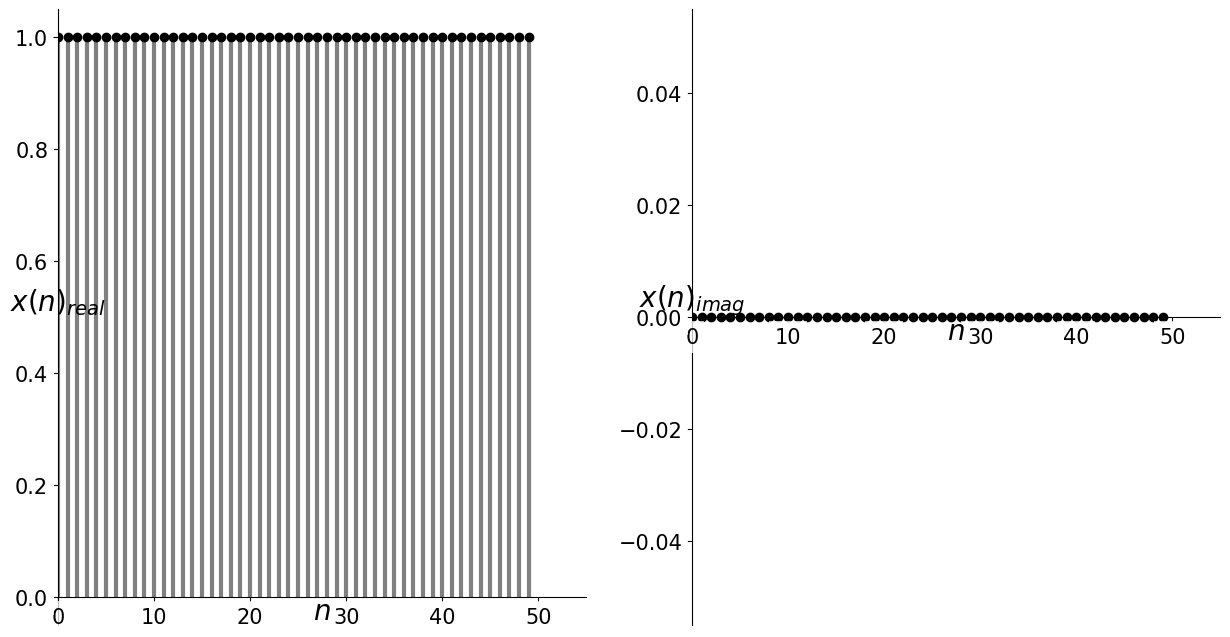

In [2]:
plt.rcParams['figure.figsize'] = 15, 8
plt.rcParams['lines.linewidth'] = 3
n1 = np.arange(0, 50)
def widget1(sig, f):

    s = sig + 2j*np.pi*f
    x = np.exp(s*n1)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1, ax2 = Ax(ax1), Ax(ax2)
    ax1.stem(n1, x.real,  use_line_collection=True,                             #Se realiza la gráfica discreta
                linefmt='grey', markerfmt='ko',
                basefmt=" ")
    ax1.set_xlabel("$n$")
    ax1.set_ylabel(r'$x(n)_{real}$')
    ax1.set_xlim(0, 55)

    ax2.stem(n1, x.imag,  use_line_collection=True,                             #Se realiza la gráfica discreta
                linefmt='grey', markerfmt='ko',
                basefmt=" ")
    ax2.set_xlabel("$n$")
    ax2.set_ylabel(r'$x(n)_{imag}$')
    ax2.set_xlim(0, 55)

display(ipy.interactive(
    widget1,
        sig=ipy.FloatText(
            value=0, step=0.1,
            description='sigma: ',
            style=dict(description_width='initial'),
            continuous_update=False),
        f=ipy.FloatText(
            value=0, step=0.1,
            description='f: ',
            continuous_update=False)
))

<p align = "center"><b>Tablero 6.1. </b> Señal exponencial compleja discreta

<p align = "justify"><b><h4>Ejemplo 6.1: <h4\></b>El ejemplo ilustra la señal exponencial compleja y sus parámetros. El módulo de Python <a href = "http://docs.sympy.org/latest/index.html">SymPy</a> es usado para este propósito. Este proporciona funcionalidad para las variables y funciones simbólicas, así como su cálculo. Las variables simbólicas requeridas deben definirse explícitamente antes de su uso. En este ejemplo, $t$, $\omega$ y $\sigma$ son definidos como variables simbólicas reales, seguido por la definición de la propia señal exponencial.

Código 6.2: permite declarar una función exponencial compleja de forma simbólica.

In [3]:
from sympy import *                                                             #Se importa el modulo Sympy y sus clases
init_printing()                                                                 #se inicializa para mostrar en pantalla

t, sigma, Omega = symbols('t sigma Omega', real=True)                           #Se declaran las variables simbólicas
x = Function('x')(t)                                                            #Se declara una función simbólica
s = sigma + I*Omega
signal = exp(s*t)                                                               #Se crea la función exponencial
Eq(x, signal)                                                                   #Se establece la ecuación

        t⋅(ⅈ⋅Ω + σ)
x(t) = ℯ           

<p align = "justify">Ahora tomando valores específicos para la frecuencia compleja $s = \sigma + j \Omega$ con fines ilustrativos, una nueva señal es definida. La parte real e imaginaria de la señal es graficada.

Código 6.3: genera una señal exponencial compleja continua.

        t⋅(-0.2 + 4⋅ⅈ)
x(t) = ℯ              

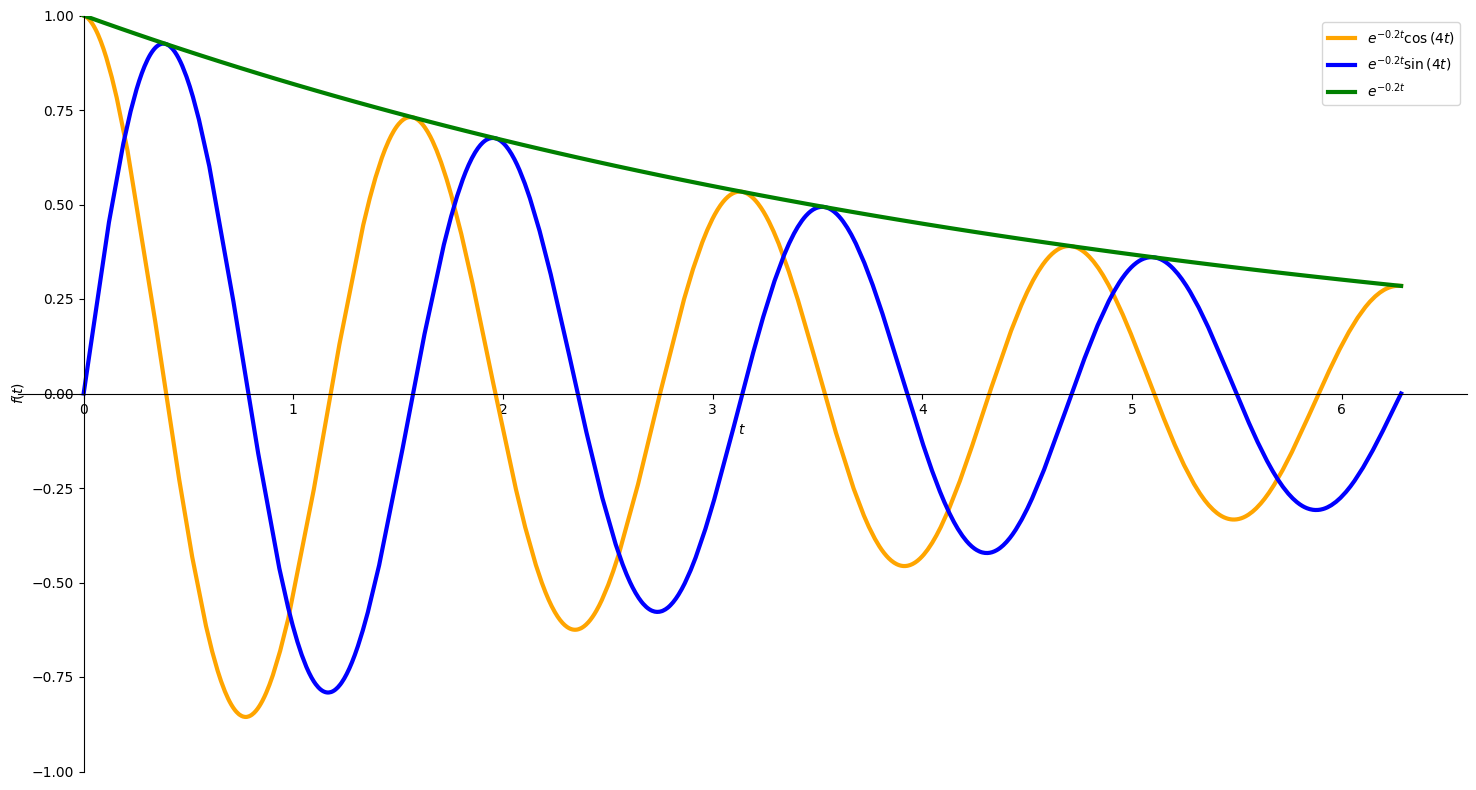

          -0.2⋅t         
xᵣₑ(t) = ℯ      ⋅cos(4⋅t)

          -0.2⋅t         
xᵢₘ(t) = ℯ      ⋅sin(4⋅t)

In [4]:
y = signal.subs({Omega: 4, sigma : -0.2})
display(Eq(x, y))

t_limits = (t, 0, 2*pi)

p1 = plot(re(y), t_limits, ylim=[-1,1], show = False,
          line_color = 'orange', legend = True)                                 #r' indica al linterprete una variable tipo string
p2 = plot(im(y), t_limits, ylim=[-1,1], show = False,
          line_color = 'blue', legend = True)
p3 = plot(Abs(y), t_limits, ylim=[-1,1], show = False,
          line_color = 'green', legend = True)
p1.extend(p2)
p1.extend(p3)
p1.show()                                                                       #Se muestra la grafica

x_re = Function('x_re')(t)
x_im = Function('x_im')(t)
display(Eq(x_re, re(y)))
display(Eq(x_im, im(y)))

<p align = "center"><b>Tablero 6.2. </b> Señal exponencial compleja continua

### **6.1.2. Impulso de Dirac - Función delta $\delta(t)$**

<p align = "justify">El impulso de Dirac es una de las más importantes funciones en la teoría de señales y sistemas. Es usada para  caracterizar sistemas LTI y el modelar  señales similares a impulsos. El impulso de Dirac es definido de la forma <a href = "https://en.wikipedia.org/wiki/Dirac_delta_function">Fun`ión delta de Dirac</a> la cual no es una función en el sentido convencional. Es una función generalizada o <i>distribución</i>.

\begin{equation}
\delta(t) = \begin{cases} 0 & t \neq 0 \\  \infty & t=0  \end{cases} \tag{6.7}
\end{equation}

<p align = "justify">El impulso de Dirac es denotado como $\delta(t)$. La función delta de Dirac se define en términos de sus propiedades solamente y por su efecto sobre otras funciones. Note entonces que función impulso puede ser descrita por cualquier función que cumpla sus propiedades.

\begin{equation}
\begin{split}
\int_{-\infty}^{\infty} \delta(t) dt = 1\\
\delta(t) = 0, t \neq 0
\end{split}
\end{equation}

<p align = "justify">Para el caso discreto, la función delta de Dirac se define de la siguiente manera:

\begin{equation}
\delta(n) = \begin{cases} 0 & n \neq 0 \\  1 & n=0  \end{cases} \tag{6.9}
\end{equation}

<p align = "justify">Denotada como $\delta(n)$, cumple la siguiente propiedad:

\begin{equation}
    \sum_{n=-\infty}^{\infty} \delta(n)= 1 \tag{6.10}
    \end{equation}

<p align = "justify">Si se suponemos la función $\phi(t)$ (función de prueba), la cual se hace cero en algún lugar finito, entonces la función $\delta(t)$ se definirá como una función simbólica por la relación:

\begin{equation}
\int_{-\infty}^{\infty} \delta(t) \cdot \phi(t)dt = \phi(0) \tag{6.11}
\end{equation}

<p align = "justify">La expresión anterior no tiene el significado común de una integral definida, sino que la integral, asi como la función $\delta(t)$, están definidas por el valor $\phi(0)$, asignado a la función $\phi(t)$. Con la información dada, la función $\delta(t)$ se tratará como una función ordinaria sólo para los valores de las integrales donde aparezca. Además, la función delta $\delta(t)$ es también llamada función impulso o función kroncker y se puede interpretar como la acción que hace angosta otra función dada, $E_{\alpha}(t-t_0)$, definida con área unitaria en la forma:

\begin{equation}
\int_{-\infty}^{\infty} E_{\alpha}(t-t_0)~dt = \alpha \frac{1}{\alpha} = 1 \tag{6.12}
\end{equation}

<p align = "justify">de tal manera que su base determinada para un intervalo de tiempo $(t_0 - \frac{\alpha}{2}, t_0 + \frac{\alpha}{2})$ tiende a cero.

\begin{equation}
\delta(t-t_0) \triangleq \lim_{\alpha \to 0} E_{\alpha}(t-t_0) = \lim_{\alpha \to 0} \begin{cases} 0 & |t-t_0| > \frac{\alpha}{2} \\  \frac{1}{\alpha} & |t-t_0| \leq \frac{\alpha}{2}   \end{cases} \tag{6.13}
\end{equation}

<p align = "justify">El tablero 6.3 permite variar los parámetros $\alpha$ y $t_0$ de la función $E_\alpha (t-t_0)$.

Código 6.4: genera una función gate.

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='alpha:', max=10.0, min=0.01…

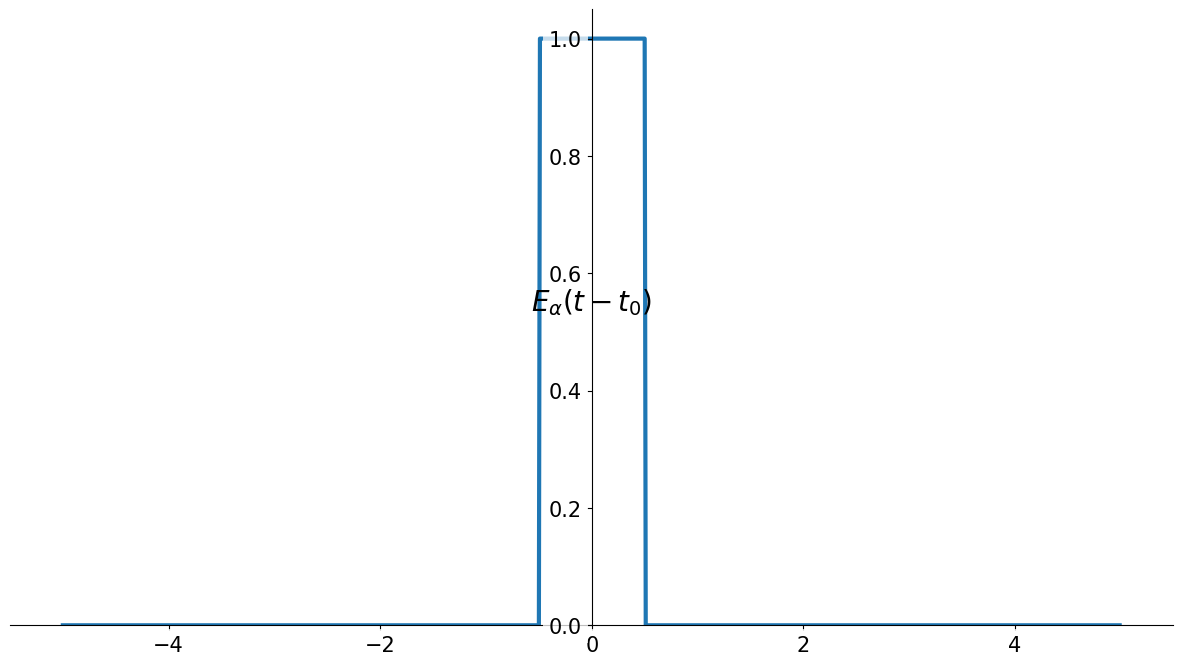

In [5]:
t1 = np.arange(-5, 5, 0.01)
def widget2(alpha, t0):
    x = np.piecewise(t1, [np.abs(t1-t0) <= .5 * alpha], [1/alpha])
    fig, ax = plt.subplots(1)
    ax = Ax(ax)
    ax.plot(t1, x)
    ax.set_ylim(0)
    ax.set_ylabel(r'$E_{\alpha}(t-t_0)$')

display(ipy.interactive(
    widget2,
        alpha=ipy.FloatSlider(
            value=1, min=0.01, max=10.0, step=0.01,
            description='alpha:',
            style=dict(description_width='initial'),
            continuous_update=False),
        t0=ipy.FloatSlider(
            value=0, min=-5, max=5, step=0.1,
            description='t0:',
            style=dict(description_width='initial'),
            continuous_update=False)
))

<p align = "center"><b>Tablero 6.3. </b> Función gate para diferentes valores de alpha

<p align = "justify">Ahora bien, la expresión $\beta \cdot \delta(t-t_0)$ puede interpretarse como el área del pulso elemental.

#### **6.1.2.1. Propiedades de la función $\delta(t)$**

<p align = "justify">1. <b>Propiedad de selectividad</b>

\begin{equation}
\int_{-\infty}^{\infty} \delta(t) \cdot \phi(t) = \phi(0)
\end{equation}

<p align = "justify">donde $\phi(t)$ necesita ser diferenciable en $t=0$. La propiedad de selectividad implica $\int_{-\infty}^{\infty} \delta(t) = 1$. Ahora bien la expresión se determinará de la siguiente forma.

\begin{equation}
\int_{-\infty}^{\infty} \delta(t-t_{0}) \cdot \phi(t)dt = \phi(t_{0}) \tag{6.14}
\end{equation}

**Demostración:**

<p align = "justify">Realizando el cambio de variable $x = t-t_0$, $dx = dt$, la integral anterior queda de la siguiente forma:

\begin{equation}
\int_{-\infty}^{\infty} \delta(x) \phi(x+t_0)~dx = \phi(x+t_0) \Big|_{x=0} = \phi(t_0)
\end{equation}

<p align = "justify">2. <b>Escalamiento</b>

\begin{equation}
\int_{-\infty}^{\infty} \delta(a t) \cdot \phi(t)~dt = \frac{1}{|a|} \phi(0) \tag{6.15}
\end{equation}

<p align = "justify">donde $a \in \mathbb{R} \setminus 0$ (sin incluir el 0). Esto implica que el impulso de Dirac es una función con simetría uniforme.

**Demostración:**

<p align = "justify">Para $a>0$ sea $x = a\cdot t$ y $dx = a\cdot dt$.

\begin{equation*}
\begin{split}
\int_{-\infty}^{\infty} \delta(at)\cdot \phi(t)dt &= \int_{-\infty}^{\infty} \delta(x) \cdot \phi \left(\frac{x}{a} \right)~\frac{dx}{a}\\
&= \frac{1}{a} \int_{-\infty}^{\infty} \delta(x) \cdot \phi \left(\frac{x}{a} \right)dx\\
&= \frac{1}{a} \phi \left( \frac{x}{a} \right) \Big|_{x = 0}\\
&=\frac{1}{a} \phi(0)
\end{split}
\end{equation*}

<p align = "justify">Para $a< 0$ sea $x = a\cdot t$ y $dx = a\cdot dt$.

\begin{equation*}
\begin{split}
\int_{-\infty}^{\infty} \delta(at)\cdot \phi(t) &= \int_{\infty}^{-\infty} \delta(x) \cdot \phi \left(\frac{x}{a} \right)~\frac{dx}{a}\\
&= \frac{1}{|a|} \int_{-\infty}^{\infty} \delta(x) \cdot \phi \left(\frac{x}{a} \right)dx\\
&= \frac{1}{|a|} \phi \left( \frac{x}{a} \right) \Big|_{x = 0}\\
&=\frac{1}{|a|} \phi(0)
\end{split}
\end{equation*}

<p align = "justify">En general

\begin{equation}
\int_{-\infty}^{\infty} \delta(at) \cdot \phi(t)~dt = \frac{1}{|a|} \phi(0)
\end{equation}

    
<p align = "justify">3. <b>Multiplicación</b>

\begin{equation}
x(t) \cdot \delta(t) = x(0) \cdot \delta(t) \tag{6.16}
\end{equation}

<p align = "justify">donde $x(t)$ debe ser continua en $t=0$.

**Demostración:**

\begin{equation}
\int_{-\infty}^{\infty} x(t) \cdot \delta(t) \cdot \phi(t)~dt = x(0)\cdot \phi(0)
\end{equation}

<p align = "justify">Por definición:

\begin{equation}
\phi(0) = \int_{-\infty}^{\infty} \delta(t) \phi(t)~dt
\end{equation}

<p align = "justify">Por lo tanto:

\begin{equation}
\int_{-\infty}^{\infty} x(t) \cdot \delta(t) \cdot \phi(t)~dt = \int_{-\infty}^{\infty} x(0) \cdot \delta(t) \cdot \phi(t)~dt
\end{equation}

<p align = "justify">De donde

\begin{equation}
x(0) \cdot \delta(t) = x(t) \cdot \delta(t)
\end{equation}



<p align = "justify"><b><h4>Ejemplo 6.2: <h4\></b> Calcular: $t\cdot \delta(t)$.

**Desarrollo**
\begin{equation}
t \cdot \delta(t) = 0\cdot \delta(t) = 0
\end{equation}

<p align = "justify"><b><h4>Ejemplo 6.3: <h4\></b>Demostrar que $\delta(at) = \frac{1}{|a|}\cdot \delta(t)$.

**Desarrollo**

\begin{equation}
\int_{-\infty}^{\infty} \delta(at)\cdot \phi(t)~dt = \frac{1}{|a|}\phi(0)
\end{equation}

<p align = "justify">Por definición:

\begin{equation}
\phi(0) = \int_{-\infty}^{\infty} \delta(t) \phi(t)~dt
\end{equation}

<p align = "justify">Por lo tanto:

\begin{equation}
\int_{-\infty}^{\infty} \delta(at)\cdot \phi(t)~dt = \int_{-\infty}^{\infty} \frac{1}{|a|} \delta(t)\cdot \phi(t)~dt
\end{equation}

<p align = "justify">De donde:

\begin{equation}
\delta(at)=\frac{1}{|a|} \delta(t)
\end{equation}

<p align = "justify"><b><h4>Ejemplo 6.4: <h4\></b>Demostrar que un impulso unitario es una función par.

**Desarrollo**

<p align = "justify">Evaluando la expresión $\delta(at)=\frac{1}{|a|} \delta(t)$ para $a=-1$, se obtiene $\delta(-t)= \delta(t)$. Por lo tanto, $\delta(t)$ es una función par.

<p align = "justify">4. <b>Derivación</b>

\begin{equation}
\int_{-\infty}^{\infty} \frac{d}{dt}\delta(t) \cdot x(t) \; dt = - \frac{d}{dt}x(t) \bigg\vert_{t = 0} \tag{6.17}
\end{equation}

**Demostración:**

<p align = "justify">Para demostrar esta propiedad observemos el siguiente ejercicio.

\begin{equation*}
\begin{split}
\int_{-\infty}^{\infty} \frac{d}{dt}f(t)\cdot \phi(t)dt\\
u = \phi(t), ~ du = \frac{d}{dt}\phi(t)~dt\\
dv = \frac{d}{dt}f(t)~dt, ~ v = f(t)\\
\int_{-\infty}^{\infty} \frac{d}{dt}f(t)\cdot \phi(t)dt=\phi(t)\cdot f(t) \bigg\vert_{-\infty}^{\infty} - \int_{-\infty}^{\infty} f(t)\cdot \frac{d}{dt}\phi(t)dt
\end{split}
\end{equation*}

<p align = "justify">Como $\lim_{t \to \pm \infty} \phi(t) = 0$.

\begin{equation}
\int_{-\infty}^{\infty} \frac{d}{dt}f(t) \cdot \phi(t)~dt = - \int_{-\infty}^{\infty} f(t)\cdot \frac{d}{dt}\phi(t)~dt \tag{6.18}
\end{equation}


<p align = "justify">Apartir de esta igualdad evaluamos la derivada de la función impulso $\delta(t)$ así:

\begin{equation*}
\begin{split}
\int_{-\infty}^{\infty} \frac{d}{dt}\delta(t)\cdot \phi(t)dt &= - \int_{-\infty}^{\infty} \delta(t)\cdot \frac{d}{dt}\phi(t)dt\\
&= -\frac{d}{dt}\phi(t) \bigg\vert_{t=0}
\end{split}
\end{equation*}

<p align = "justify">Finalmente

\begin{equation}
\int_{-\infty}^{\infty} \frac{d}{dt}\delta(t) \cdot \phi(t)dt = = -\frac{d}{dt}\phi(t) \bigg\vert_{t=0}
\end{equation}

<p align = "justify">5. <b>Linealidad</b>

\begin{equation}
a \cdot \delta(t) + b \cdot \delta(t) = (a+b) \cdot \delta(t)
\end{equation}
    
<p align = "justify">Es importante notar que el producto de $\delta(t) \cdot \delta(t)$ dos impulsos de Dirac no está definido.

<p align = "justify"><b><h4>Ejemplo 6.5: <h4\></b> Este ejemplo ilustra algunas propiedades básicas del impulso de Dirac. Primero definamos un impulso de Dirac:

Código 6.5: delclara la funcón delta de Dirac.

In [6]:
delta = DiracDelta(t)
display(delta)

δ(t)

<p align = "justify">Ahora probemos la propiedad de selectividad definiendo una señal arbitraria (función) $f(t)$ e integrando su producto con el impulso Delta.

Código 6.6: aplica la propiedad de selectividad.

In [7]:
f = Function('f')(t)
expr = Integral(delta*f, (t, -oo, oo))
display(expr)
display(expr.doit())

∞              
⌠              
⎮  f(t)⋅δ(t) dt
⌡              
-∞             

f(0)

<p align = "justify">Ahora probemos la propiedad de escalamiento.

Código 6.7: aplica la propiedad de escalamiento.

In [8]:
a = symbols('a')
expr = Integral(delta.subs(t, a*t)*f, (t, -oo, oo))
display(expr)
display(expr.doit())

∞                
⌠                
⎮  f(t)⋅δ(a⋅t) dt
⌡                
-∞               

f(0)
────
│a│ 

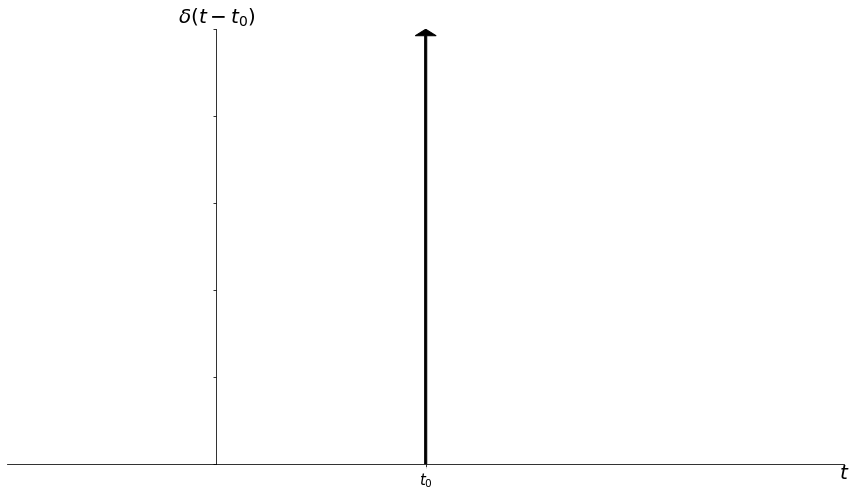

<p align = "center"><b>Figura 6.1. </b> Función delta de Dirac

### **6.1.3. Señal Heaviside - Función escalón**

<p align = "justify">La función escalón o <a href = "https://en.wikipedia.org/wiki/Heaviside_step_function"> Heaviside</a> se define como:

\begin{equation}
\mu(t) = \begin{cases} 0 & t< 0  \\ 1 & t \geq 0 \end{cases} \tag{6.19}
\end{equation}

<p align = "justify">Para el caso discreto, la función escalón se define de la siguiente manera:

\begin{equation}
\mu(n) = \begin{cases} 0 & n< 0  \\ 1 & n \geq 0 \end{cases} \tag{6.20}
\end{equation}

<p align = "justify">Algunas definiciones alternativas existen con respecto al valor de $\mu(t)$ en $t=0$. La función Heaviside se usa para representar un cambio o interruptor en un punto específico del tiempo y se mantiene encendido de forma indefinida. La función escalón y delta se relacionan mediante la siguiente expresión:

\begin{equation}
\int_{-\infty}^{t} \delta(\tau) \; d\tau = \mu(t) \tag{6.21}
\end{equation}

**Demostración:**

\begin{equation}
\int_{-\infty}^{\infty} \frac{d}{dt}\mu(t)\cdot \phi(t)~dt = - \int_{-\infty}^{\infty} \mu(t)\cdot \frac{d}{dt}\phi(t)~dt\\
\int_{-\infty}^{\infty} \frac{d}{dt}\mu(t)\cdot \phi(t)~dt = -\int_{0}^{\infty} \frac{d}{dt} \phi(t)~dt\\
\int_{-\infty}^{\infty} \frac{d}{dt}\mu(t)\cdot \phi(t)~dt = -\phi(t) \bigg\vert_0^{\infty}\\
\int_{-\infty}^{\infty} \frac{d}{dt}\mu(t)\cdot \phi(t)~dt = \phi(0)\\
\int_{-\infty}^{\infty} \frac{d}{dt}\mu(t)\cdot \phi(t)~dt = \int_{-\infty}^{\infty}\delta(t)\cdot\phi(t)~dt
\end{equation}

<p align = "justify">Por lo tanto:

\begin{equation}
\frac{d}{dt}\mu(t) = \delta(t) \tag{6.22}
\end{equation}

\begin{equation}
\mu(t) = \int_{-\infty}^{t} \delta(\tau) \; d\tau
\end{equation}

<p align = "justify"><b><h4>Ejemplo 6.6: <h4\></b>A continuación una señal Heaviside $\mu(t)$ se define y SymPy. Note que <i>SymPy</i> denota la función Heaviside como $\theta(t)$.

Código 6.8: delcara la función Heaviside.

In [9]:
step = Heaviside(t)                                                             #Se declara la función Heaviside
step

θ(t)

Código 6.9: gráfica la función Heaviside.

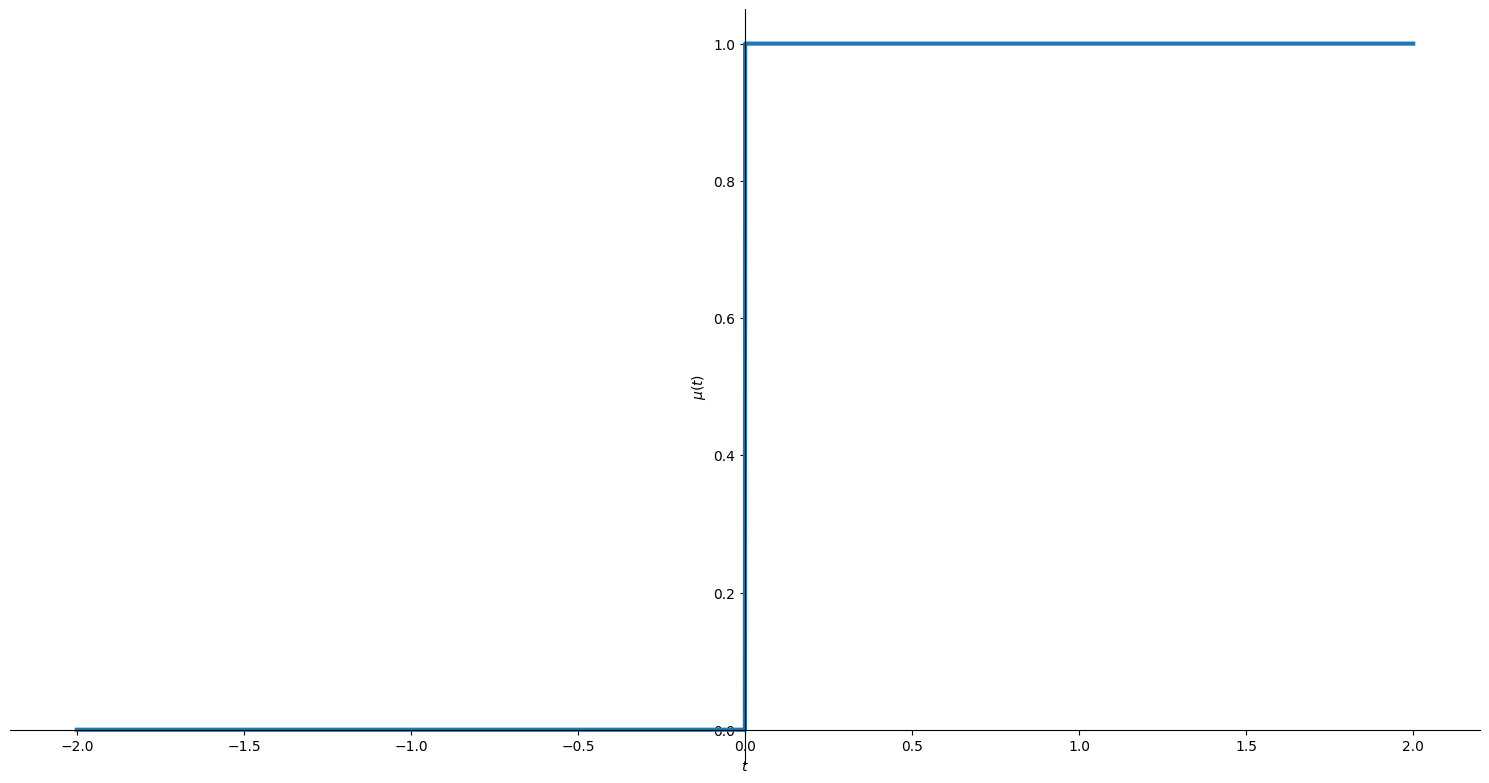

In [10]:
p = plot(step, (t, -2, 2), ylabel=r'$\mu(t)$')                                  #Se crea la grafica

<p align = "center"><b>Tablero 6.4. </b> Función Heaviside

<p align = "justify">Ahora se construye un armónico (señal coseno o seno) $\cos(\omega t)$ con $\omega=2$, la cual se enciende en $t=0$:

\begin{equation}
x(t) = \cos(\omega t) \cdot \mu(t)
\end{equation}

Código 6.10: genera la función Heaviside con un armónico.

In [ ]:
x = cos(Omega*t) * step                                                         #Se declara la función
p = plot(x.subs(Omega,2), (t, -2, 10), ylim=[-1.2, 1.2], ylabel=r'$x(t)$')      #Se realiza la grafica

<p align = "center"><b>Tablero 6.5. </b> Función Heaviside con armónico

### **6.1.4. Señal pulso rectangular**

<p align = "justify">La función <a href = "https://en.wikipedia.org/wiki/Rectangular_function">pulso rectangular</a> se define como:

\begin{equation}
\text{rect}_d(t) = d \cdot E_d(t) = \begin{cases} 1 & |t| \leq \frac{d}{2} \\ 0 & |t| > \frac{d}{2} \end{cases} \tag{6.23}
\end{equation}

<p align = "justify">Para el caso discreto, la función pulso rectangular se define de la siguiente manera:

\begin{equation}
\text{rect}_M(n) = \begin{cases} 1 & |n| \leq M \\ 0 & |n| > M \end{cases} \tag{6.24}
\end{equation}

<p align = "justify">Con $M \in \mathbb{Z}$.

<p align = "justify">Algunas definiciones alternativas existen difiriendo del valor de $\text{rect}_d(t)$ para $t = \pm \frac{d}{2}$. La señal pulso rectangular se utiliza para representar un encendido por un intervalo limitado de tiempo o de duración finita, y se relaciona con la función Heaviside así:

\begin{equation}
\text{rect}_d(t) = \mu \left(t + \frac{d}{2} \right) - \mu \left(t - \frac{d}{2} \right) \tag{6.25}
\end{equation}

<p align = "justify"><b><h4>Ejemplo 6.7: <h4\></b>A continuación se define la función pulso rectangular de ancho $d=1$ desde el escalón en <i>SymPy</i>:

Código 6.11: declara y gráfica la función $rect_1(t)$.

In [ ]:
rect = Heaviside(t+.5) - Heaviside(t-.5)                                        #Se declara la función rect
p = plot(rect, (t, -1, 1), ylabel=r'rect$(t)$')

<p align = "center"><b>Tablero 6.6. </b> Función $rect_1(t)$

<p align = "justify"><b><h4>Ejemplo 6.8: <h4\></b>Use la función $\text{rect}_d(t)$ para construir una función $\cos(\omega t)$ con $\omega=5$, la cual se enciende en $t=-\frac{1}{2}$ y se apaga en $t=+\frac{1}{2}$.

Código 6.12: declara y gráfica la función $rect_1(t)$ con armónico.

In [ ]:
x = rect * cos(5*t)
p = plot(x, (t, -1, 1), ylim=[-1.2, 1.2], ylabel=r'$x(t)$')

<p align = "center"><b>Tablero 6.7. </b> Función $rect_1(t)$ con armónico

### **6.1.5. Función signo**

<p align = "justify">La función <a href = "https://en.wikipedia.org/wiki/Sign_function">signo/signum function</a> evalúa el signo de su argumento:

\begin{equation}
\text{sgn}(t) = \begin{cases} 1 & t>0 \\ 0 & t=0 \\ -1 & t < 0  \end{cases} \tag{6.26}
\end{equation}

<p align = "justify">Para el caso discreto, la función signo se define de la siguiente manera:

\begin{equation}
\text{sgn}(n) = \begin{cases} 1 & n>0 \\ 0 & n=0 \\ -1 & n < 0  \end{cases} \tag{6.27}
\end{equation}

<p align = "justify">La señal <i>sgn</i> es útil para representar el valor absoluto de una señal real $x(t) \in \mathbb{R}$ como:

\begin{equation}
|x(t)| = x(t) \cdot \text{sgn}(x(t)) \tag{5.28}
\end{equation}

<p align = "justify">y se relaciona con la señal Heaviside como:

\begin{equation}
\text{sgn}(t) = 2 \cdot \mu(t) - 1 \tag{6.29}
\end{equation}

<p align = "justify"><b><h4>Ejemplo 6.9: <h4\></b>El siguiente ejemplo ilustra la función $\text{sgn}(t)$. Note que la función sign se representa como $\text{sign}(t)$ en <i>Sympy</i>.

Código 6.13: declara la función signo.

In [ ]:
sgn = sign(t)                                                                   #Se declara la función signo
sgn

Código 6.14: gráfica la función signo.

In [ ]:
p = plot(sgn, (t, -2, 2), ylim=[-1.2, 1.2], ylabel=r'sgn$(t)$')

<p align = "center"><b>Tablero 6.8. </b> Función singo

<p align = "justify"><b><h4>Ejemplo 6.10: <h4\></b>Genere un rectificador de onda completa utilizando la función $\text{sgn}(t)$.

Código 6.15: grafica rectificador de onda completa.

In [ ]:
x = cos(Omega*t)*sgn.subs(t, cos(Omega*t))                                      #Se declara la función
p = plot(x.subs(Omega,5), (t, -1, 1), ylabel=r'$x(t)$')

<p align = "center"><b>Tablero 6.9. </b> Rectificador de onda completa

## **Ejercicios propuestos**

<p align = "justify"><b>Ejercicio 6.1. </b>Derivar la propiedad de selectividad, para un impulso de Dirac desplazado $\delta(t-\tau)$.

<p align = "justify"><b>Ejercicio 6.2. </b>Demostrar la simetría de la función $\delta(t)$.

<p align = "justify"><b>Ejercicio 6.3. </b>Pruebe otros valores <i>omega</i> y <i>sigma</i> para crear señales exponenciales complejas con amplitud creciente/decreciente/constante y diferentes frecuencias angulares.

<p align = "justify"><b>Ejercicio 6.3. </b>Utilizando utilizando el módulo de phyton <i>SimPy</i>, cree un algoritmo para dibujar el correspondiente diagrama de polos y ceros de una función exponencial compleja.

**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.